In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n = 200

In [0]:
test = 10*np.random.randn(n*10).reshape((n,10))+10

In [0]:
test = np.random.randint(10, size = (n,10))

In [0]:
test = np.arange(0,10*n).reshape((n,10))

In [0]:
gram = [[] for i in range(n)]

In [0]:
for i in range(n):
  for j in range(n):
    gram[i].append(np.dot(test[i,:], test[j,:]))

In [0]:
gram  = np.array(gram)

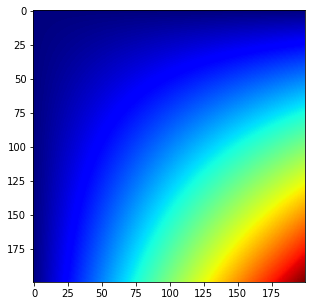

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(gram, cmap = 'jet')

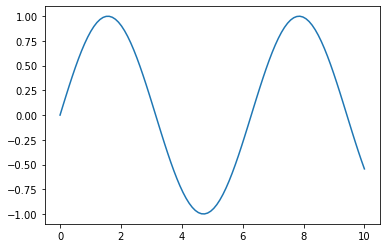

In [10]:
t = np.linspace(0,10,100)
x = np.sin(t)
plt.plot(t,x)
N = 1

In [0]:
phi = np.arccos(x)
r = t/N

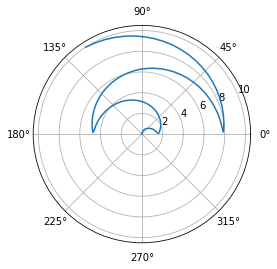

In [12]:
plt.polar(phi, r)

In [13]:
plt.imshow(G_calculator(phi))
plt.colorbar()

NameError: ignored

In [0]:
x = np.random.randn(len(t))

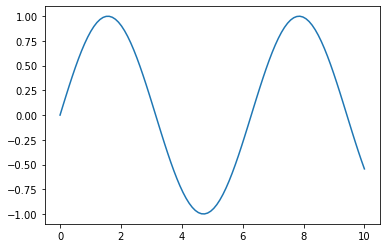

In [14]:
plt.plot(t,x)

In [0]:
x = (x-x.max() + x - x.min())/(x.max() - x.min())

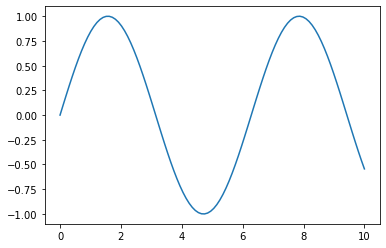

In [16]:
plt.plot(t,x)

In [0]:
phi = np.arccos(x)
r = t/0.1

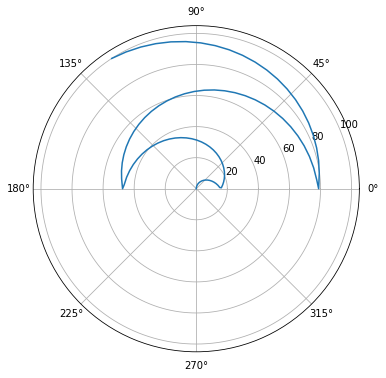

In [18]:
plt.figure(figsize=(6,6))
plt.polar(phi, r)

In [0]:
G = [[] for i in range(phi.shape[0])]

In [20]:
plt.imshow(G_calculator(phi))

NameError: ignored

In [0]:
########################################################

In [0]:
def G_calculator(phi):
  G = [[] for i in range(phi.shape[0])]
  for i in range(phi.shape[0]):
    for j in range(phi.shape[0]):
      G[i].append(phi[i] + phi[j])

  return np.array(G)

In [0]:
def Scaler(x):
  max_ = x.max()
  min_ = x.min()
  X = (x-max_ + x-min_)/(max_ - min_)
  return X

In [0]:
t = np.linspace(0,10,1000)

In [0]:
x = t*2 + 5*np.sin(t) + t*2 + 1/(t+1)
x = Scaler(x)

In [0]:
phi = np.arccos(x)

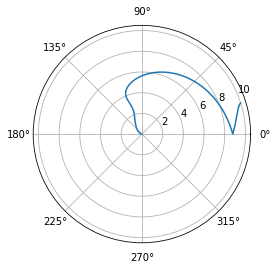

In [27]:
plt.polar(phi, t)

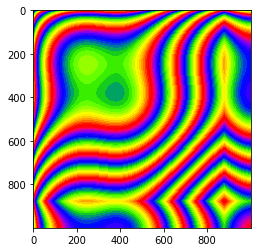

In [28]:
plt.imshow(G_calculator(phi), cmap = 'prism')

In [0]:
result = G_calculator(phi)

In [34]:
result.shape

(1000, 1000)

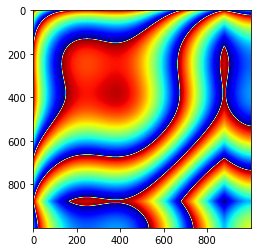

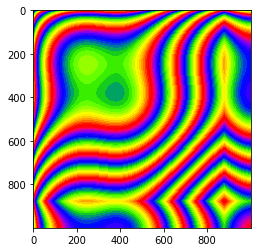

In [50]:
plt.imshow(result%1, cmap = 'jet')
plt.figure()
plt.imshow(result, cmap = 'prism')

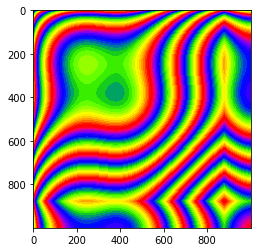

In [45]:
plt.imshow(result, cmap = 'prism')

In [37]:
result%np.pi

array([[0.        , 3.04874227, 3.01015741, ..., 0.30372045, 0.30415888,
        0.3045486 ],
       [3.04874227, 2.95589188, 2.91730703, ..., 0.21087006, 0.21130849,
        0.21169821],
       [3.01015741, 2.91730703, 2.87872217, ..., 0.17228521, 0.17272364,
        0.17311336],
       ...,
       [0.30372045, 0.21087006, 0.17228521, ..., 0.60744089, 0.60787933,
        0.60826905],
       [0.30415888, 0.21130849, 0.17272364, ..., 0.60787933, 0.60831776,
        0.60870748],
       [0.3045486 , 0.21169821, 0.17311336, ..., 0.60826905, 0.60870748,
        0.60909721]])

## Markov chain

In [0]:
def Markov_matrix_generator(bins, data):
  data = np.array(data)
  b0 = bin_finder(bins, data[0])
  W = np.zeros((len(bins), len(bins)))
  for item in range(1,len(data)):
    b1 = bin_finder(bins, data[item])
    W[b0,b1]+=1
    b0 = b1
  W = W / (W.sum(axis=1, keepdims = True) + 0.000001)  # This will normalize the W in which the transition probability in each row will sum to 1
  return W



In [0]:
def bin_finder(bins, n):
  '''
  for example:
    suppose that out bins is like this [1,3,5,7,9]

    so this function will return the following values for 1.5, 3.45, 1, 5

    1.5  ----> 0
    3.45 ----> 1
    1    ----> 0
    5    ----> 2
  '''
  eps = 0.0001
  d = bins[2] - bins[1]
  n+=eps
  return np.argmax((n>bins) * ((n-d)<bins))

In [0]:
data = 5 * np.random.randint(10, size=1000)
#plt.plot(data)

In [0]:
max_ = data.max()
min_ = data.min()

In [267]:
max_, min_

(45, 0)

In [274]:
bins = np.linspace(np.ceil(min_)-1,np.floor(max_),10)
bins

array([-1.        ,  4.11111111,  9.22222222, 14.33333333, 19.44444444,
       24.55555556, 29.66666667, 34.77777778, 39.88888889, 45.        ])

In [275]:
bins[0], bins[-1]

(-1.0, 45.0)

In [0]:
W = Markov_matrix_generator(bins, data)

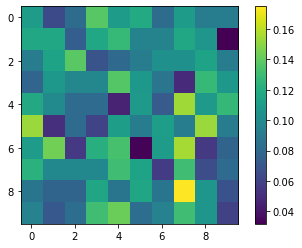

In [277]:
plt.imshow(W)
plt.colorbar()

#### test

In [0]:
bins = [1,2,3,4]

In [0]:
data = [1,2,2,1,1,2,3]

In [0]:
mat = Markov_matrix_generator(bins, data)

In [128]:
mat

array([[1., 2., 0., 0.],
       [1., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

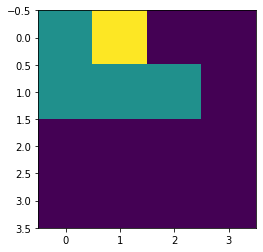

In [127]:
plt.imshow(mat)

Works correctly